# Machine Learning - Tarea 1

## Alumno: Rodríguez Ferreira Diego Ernesto

**1. Encuentra un artículo reciente de Machine Learning (periódicos, revistas) y discútelo en un par de párrafos, pon especial énfasis en el tipo de técnica que están usando (aprendizaje supervisado/no supervisado).**

**Fuente: La vanguardia**

URL: http://www.lavanguardia.com/tecnologia/20180613/4582765145/preciden-ganador-mundial-machine-learning.html
     https://arxiv.org/abs/1806.03208v3
     

Machine learning no podía quedarse fuera de la fiebre del mundial y es por ello que la universidad técnica de Dortmund realizo un sistema para poder predecir quien sería el ganador de la justa. El sistema se realizó con estadísticas de las selecciones y sus procesos pre mundialistas. Lo que hace el sistema es modelar el resultado del partido y con esto va prediciendo cual será el camino que llevarán los equipos en el mundial. Este sistema de machine learning utiliza la técnica de aprendizaje supervisado ya que se entrena con los datos que anteriormente han tenido los equipos para que pueda decidir quien tiene la mayor probabilidad de colocarse como ganador de un partido e ir caminando hasta ser el campeón del mundial.

Los ingenieros de Dortmund utilizaron también una técnica de probabilidad que se denomina árbol aleatorio, con esta técnica vemos que hay diferentes resultados que los que tienen en casas de apuestas u otros medios. Los equipos con mayor probabilidad de ser campeones son España y Alemania (lo cual por mi experiencia como aficionado de fútbol no veo tan descabellado que pueda suceder). Una de las ramas en las que se puede llegar a explotar el machine learning con facilidad es el deporte y parece ser que ya se esta poniendo en práctica.

<img src='https://pbs.twimg.com/media/Dff0JNoXcAE9bc_.jpg'>

**2 y 3. Descripción de features y regresion líneal**

In [267]:
#Importación de las librerías

%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn 
import sklearn.cross_validation
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from matplotlib import rcParams

In [246]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [247]:
print(boston.data.shape)

(506, 13)


In [248]:
print(boston.feature_names)
x=boston.feature_names[0]
bos=pd.DataFrame(boston.data)
bos.columns=boston.feature_names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [249]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [250]:
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [251]:
print(boston.target.shape)

(506,)


In [252]:
bos['PRICE'] = boston.target
print(bos.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  PRICE  
0  396.90  4.98   24.0  
1  396.90  9.14   21.6  
2  392.83  4.03   34.7  
3  394.63  2.94   33.4  
4  396.90  5.33   36.2  


In [253]:
print(bos.describe())

                0           1           2           3           4           5  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

                6           7           8           9          10          11  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [254]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [255]:
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)

In [256]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


Text(0.5,1,'Precios vs Predicción de precios: $Y_i$ vs $\\hat{Y}_i$')

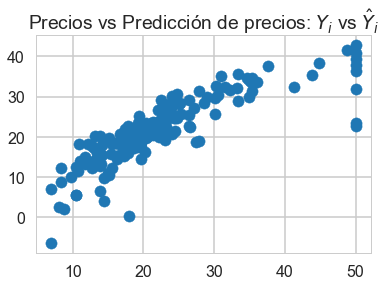

In [257]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)



plt.title("Precios vs Predicción de precios: $Y_i$ vs $\hat{Y}_i$")

In [258]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

28.541367275618256


** 4. Maquina de Soporte Vectorial**


In [259]:
#Carga del dataset de boston

from sklearn.datasets import load_boston
boston = load_boston()

In [260]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC()

Text(0,0.5,'Habitaciones')

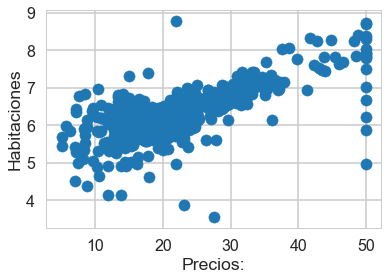

In [261]:
x=np.asarray(bos[5])
q=np.vstack(x)  #VARIABLE DE NÚMERO DE CUARTOS
z=np.asarray(boston.target)
w=np.vstack(z) #VARIABLE DE PRECIO
X=np.hstack((w,q))

plt.scatter(w,q)
plt.xlabel("Precios:")
plt.ylabel("Habitaciones")

In [262]:
bos = pd.DataFrame(boston.data)
a=np.asarray(bos[5])
a
y = [ ]
 
for i in range (len(a)):
    if a[i]<6 and w[i]<30:
        y.append(1)
    else:
        y.append(0)
y

## SE AYUDARÁN A LAS PERSONAS QUE TENGAN MENOS DE 6 HABITACIONES Y EL PRECIO DE SU CASA SEA MENOR DE 30 K

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,


In [263]:
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [264]:
g=clf.predict(X)
g

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [265]:
e=[]
f=[]
n=[]
m=[]

for i in range (506):
    if g[i]==1:
        e.append(w[i])
        f.append(q[i])        
    else:
        n.append(w[i])
        m.append(q[i])    

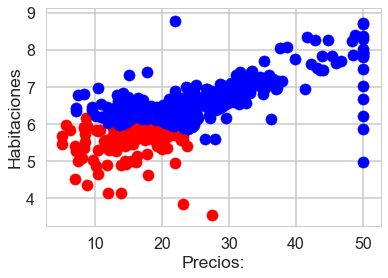

In [266]:
plt.scatter(e,f,color='red')
plt.scatter(n,m,color='blue')
plt.xlabel("Precios:")
plt.ylabel("Habitaciones")
plt.show()

## SVM Para apoyar a las familias con un apoyo del gobierno